In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image


from kalman_utils import *
from model_evaluation import plot_residuals

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

In [2]:
dt= 0.001
t= np.arange(0, 1.01, dt)
N = len(t)
traj = (2*(t**5)- 1.5*(t**4) + 0.05*(t**3) - 3*(t**2)+3*t)

t= (t)*100
traj= (traj)*100

init_global(const_acc_x=2, const_acc_y=1, dt_=dt, t_=t , N_= N, traj_=traj)

## Adding noise to the Position

Text(0.5, 1.0, 'Noisy Trajectory')

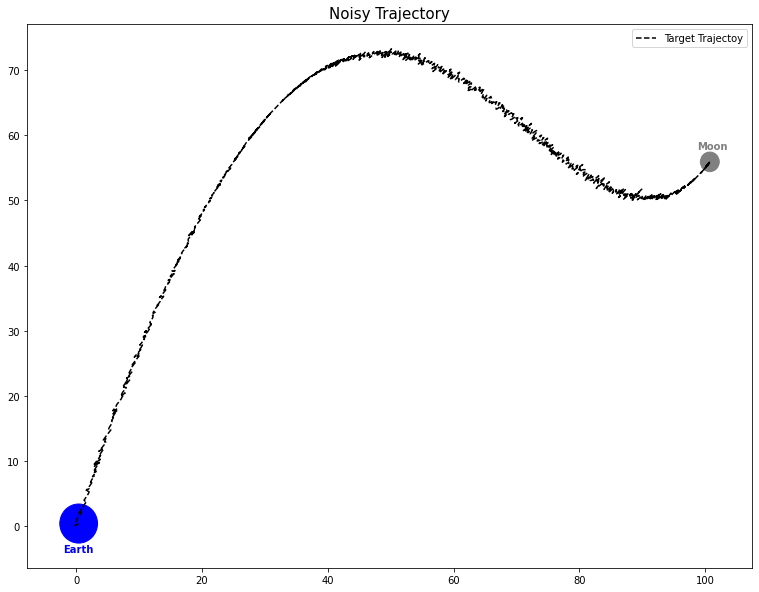

<Figure size 936x720 with 0 Axes>

In [3]:
sigma_pos = 0.3
mu_pos = 0

np.random.seed(24)

noise_t = np.random.normal(loc = mu_pos, scale = sigma_pos, size=N)

measurements = pd.DataFrame()
measurements["y_pos"] = traj+noise_t
measurements["x_pos"] = t+noise_t

x_vel, y_vel, const_acceleration_x, const_acceleration_y = get_x_y_velocities()

#measurements['x_pos']= t
#measurements['y_pos']= traj
measurements['x_vel']= x_vel
measurements['y_vel']= y_vel
measurements['x_acc']= const_acceleration_x
measurements['y_acc']= const_acceleration_y



fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)
plot_measurements(measurements,ax)

ax.set_title("Noisy Trajectory", fontsize=15)

## Kalman Filtering

In [4]:
tracker = Ship_tracker(measurements, sigma_pos)
zs = measurements[["x_pos","y_pos"]].to_numpy()

preds, cov = run(tracker, zs)

pd.DataFrame(preds, columns=["x_pos_pred", "y_pos_pred", "x_vel_pred", "y_vel_pred", "x_acc_pred", "y_acc_pred" ]).head(20).style.set_caption("Preditions")

,x_pos_pred,y_pos_pred,x_vel_pred,y_vel_pred,x_acc_pred,y_acc_pred
0,0.398764,0.398764,0.002000,0.001000,2.000000,1.000000
1,0.135329,0.233801,-0.020234,-0.013025,1.999964,0.999978
2,0.125280,0.325018,-0.020971,0.012222,1.999958,1.000030
3,0.094695,0.396031,-0.035578,0.049901,1.999911,1.000134
4,0.091484,0.497237,-0.036450,0.135048,1.999901,1.000429
5,0.087603,0.599790,-0.039646,0.258728,1.999879,1.000941
6,0.185370,0.819133,0.146350,0.610239,2.000768,1.002644
7,0.261491,1.018375,0.337973,1.013263,2.001811,1.004872
8,0.267489,1.138146,0.357985,1.306068,2.001922,1.006690
9,0.338860,1.344442,0.640967,1.899049,2.003843,1.010790


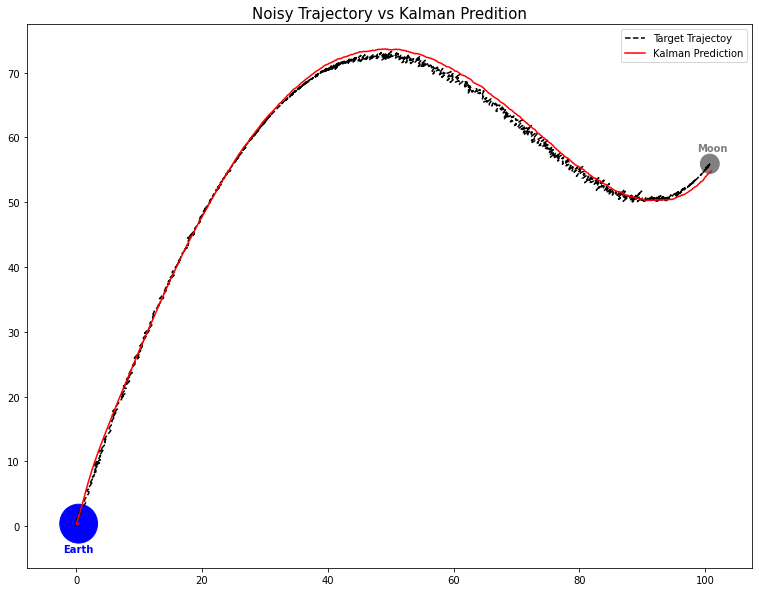

<Figure size 936x720 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)

plot_prediction(preds,measurements,ax)

ax.set_title("Noisy Trajectory vs Kalman Predition", fontsize=15)

fig.savefig(os.path.join("Plots","Position"))

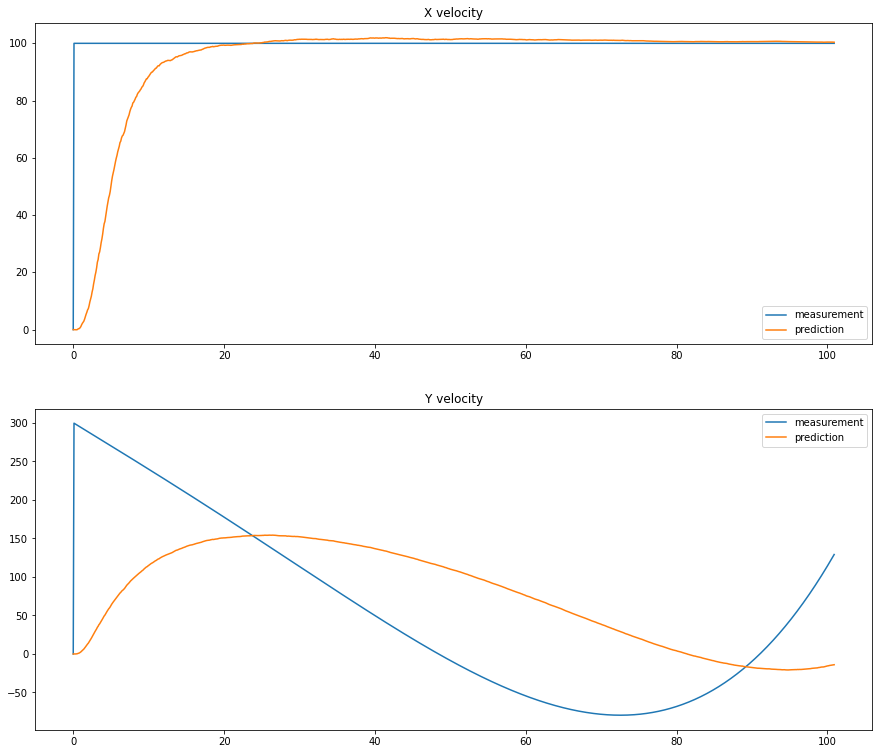

In [6]:
plt.figure(figsize=(15,13))

plt.subplot(211)
plt.title("X velocity")
plt.plot(t,measurements.x_vel, label="measurement")
plt.plot(t,preds[:,2], label="prediction")
plt.legend()

plt.subplot(212)

plt.title("Y velocity")
plt.plot(t,measurements.y_vel, label="measurement")
plt.plot(t,preds[:,3], label="prediction")
plt.legend()

plt.savefig(os.path.join("Plots","Velocities.png"))

### Create The Animation

space_anim = SpaceAnimation(preds,measurements)
folder_path = "./Animations/spaceship_pred_animation_all_data.gif"
space_anim.save_and_visualize_animation(folder_path)

### Plotting The Covariance Ellpisoide at each 50 iterations

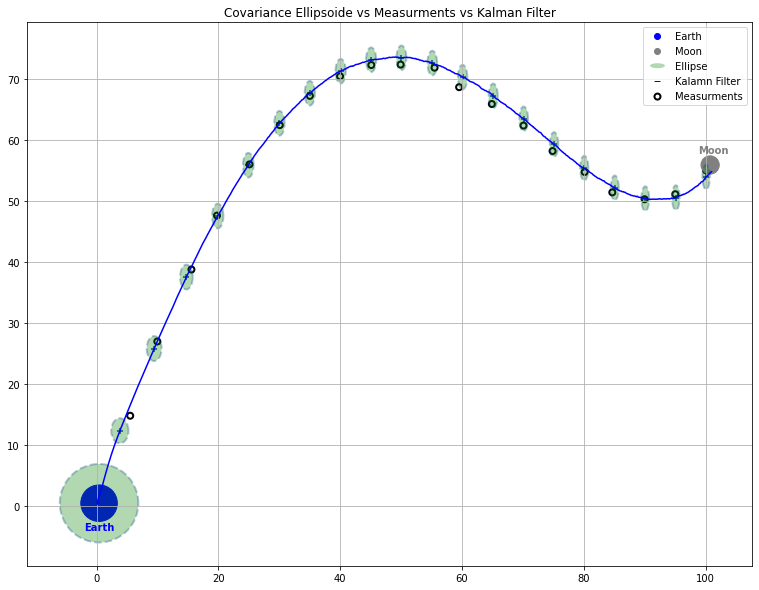

In [7]:
plot_comparison_ellipse_covariance(measurements, preds, cov )

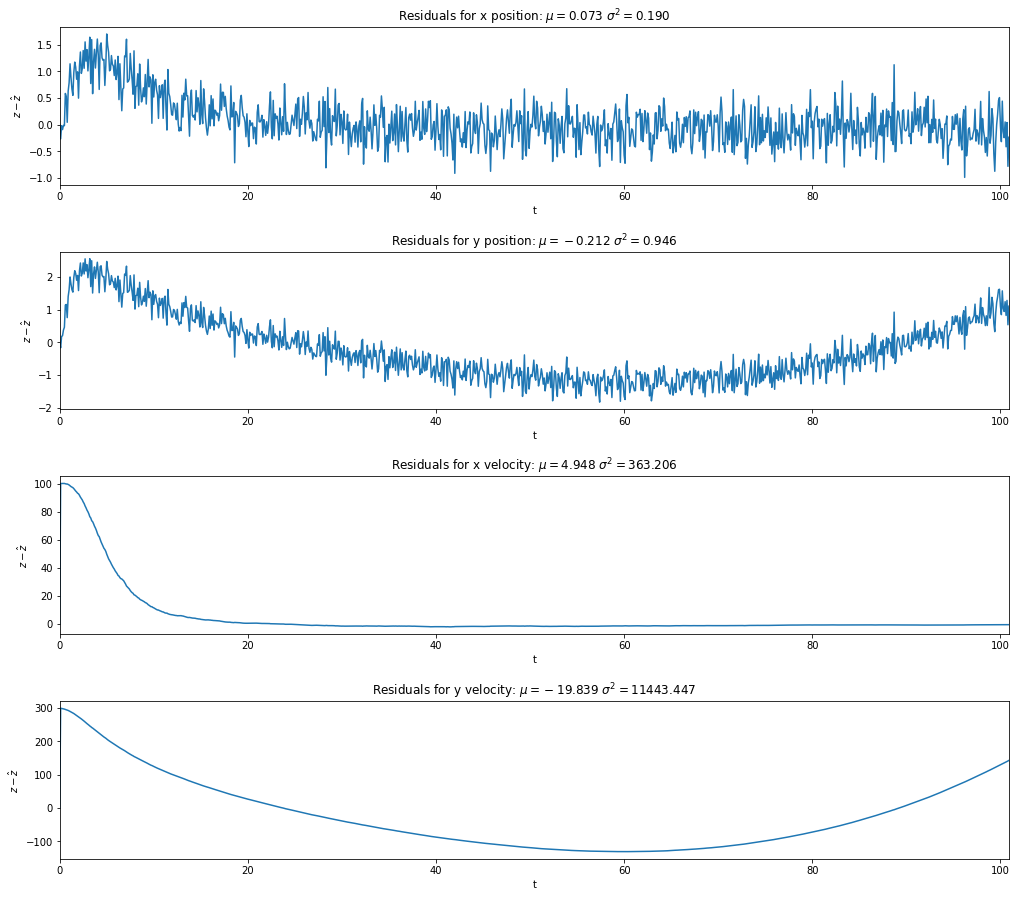

In [8]:
plt.figure(figsize=(15,13))
plt.subplot(411)
plt.tight_layout(pad=5)
plot_residuals(t, measurements, "x_pos", 0, preds, kind_of_residual="x position")
plt.subplot(412)
plot_residuals(t, measurements, "y_pos", 1, preds, kind_of_residual="y position")
plt.subplot(413)
plot_residuals(t, measurements, "x_vel", 2, preds, kind_of_residual="x velocity")
plt.subplot(414)
plot_residuals(t, measurements, "y_vel", 3, preds, kind_of_residual="y velocity")
plt.savefig(os.path.join("Plots","Residuals.png"))



In [9]:
tracker_2 = Ship_tracker(measurements, sigma_pos)
zs = measurements[["x_pos","y_pos"]].to_numpy()

preds_2, cov_2 = run_even_index_update(tracker_2, zs)

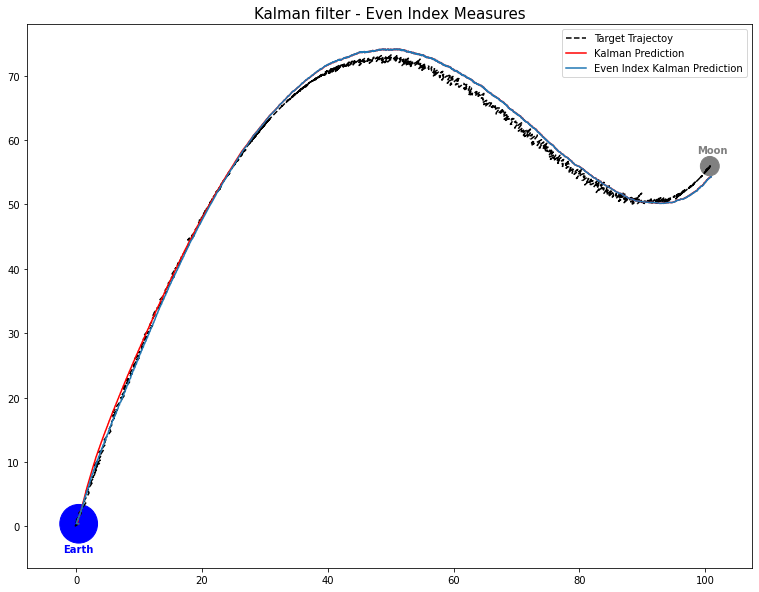

<Figure size 936x720 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)

plot_prediction(preds_2,measurements,ax)
ax.plot(preds[:,0], preds_2[:,1], label = "Even Index Kalman Prediction")
ax.legend()
ax.set_title("Kalman filter - Even Index Measures", fontsize=15)
fig.savefig(os.path.join("Plots","Even_Index_Update.png"))
